## Analysis of downloaded html from target websites

html files were downloaded in a different notebook. The next step requires extracting headline text from those html files. Because each website is different, different code was needed to extract that text. Annoying, but necessary at my level of skill.

html files from CNN, Washington Post, New York Times, NPR, Brietbart, and Fox News.

In [35]:
from urllib.request import urlopen
from bs4 import BeautifulSoup #black box
import os

import nltk
import pandas as pd
import os

import numpy as np #to do math
import matplotlib.pyplot as plt #To make plots
%matplotlib inline

In [ ]:
path="C:/path/to/html/files"
folders_pdf=os.listdir(path)
folders_pdf

In [299]:
folders_cnn[0] #example--file name includes website html was downloaded from and a time stamp.

'cnn_20180119225542.html'

## Scripts to extract unique headlines from each website:

Recordings were taken every 30-60 minutes. Often the headlines hadn't changed between recordings. So, I'm only keeping the unique headlines.

In [356]:
#fox
df_hl=pd.DataFrame()
df_hl['source']=''
df_hl['day']=0;
df_hl['hour']=0;
df_hl['headline']=''
y=0
#breitbart
folders_breitbart=[elm for elm in folders_pdf if 'breitbart' in elm]
for n in range(0,len(folders_breitbart)):
    soup=BeautifulSoup(open(os.path.join("C:/path/to/html/files" + "/" + folders_breitbart[n])),'html.parser')
    hl=soup.find('div',{'class':'col8 top-article'}).find('h2').get_text().strip();
    hl=re.sub(r'(\\x(.){2})', '',hl)
    if hl not in df_hl['headline'].values:
        df_hl.loc[y,'source']='breitbart'
        df_hl.loc[y,'day']=int(folders_breitbart[n][16:18])
        df_hl.loc[y,'hour']=int(folders_breitbart[n][18:20])
        df_hl.loc[y,'headline']=hl
        y=y+1
print(y)
#cnn
folders_cnn=[elm for elm in folders_pdf if 'cnn' in elm]
for n in range(0,len(folders_cnn)):
    soup=BeautifulSoup(open(os.path.join("C:/path/to/html/files" + "/" + folders_cnn[n])),'html.parser')
    a=str(soup)[str(soup).find("articleList"):];
    st='"\\\\u003cstrong>';sp='\\\\u003c/strong>"';
    hl=a[a.find(st)+len(st):a.find(sp)]
    if hl not in df_hl['headline'].values:
        df_hl.loc[y,'source']='cnn'
        df_hl.loc[y,'day']=int(folders_cnn[n][10:12])
        df_hl.loc[y,'hour']=int(folders_cnn[n][12:14])
        df_hl.loc[y,'headline']=hl
        y=y+1
print(y)   
#fox
folders_fox=[elm for elm in folders_pdf if 'fox' in elm]
for n in range(0,len(folders_fox)):
    soup=BeautifulSoup(open(os.path.join("C:/path/to/html/files" + "/" + folders_fox[n])),'html.parser')
    hl=soup.find('article').get_text().strip();
    hl=re.sub(r'(\\x(.){2})', '',hl)
    if hl not in df_hl['headline'].values:
        df_hl.loc[y,'source']='fox'
        df_hl.loc[y,'day']=int(folders_fox[n][10:12])
        df_hl.loc[y,'hour']=int(folders_fox[n][12:14])
        df_hl.loc[y,'headline']=soup.find('article').get_text()
        y=y+1
print(y)    
#npr
folders_npr=[elm for elm in folders_pdf if 'npr' in elm]
for n in range(0,len(folders_npr)):
    soup=BeautifulSoup(open(os.path.join("C:/path/to/html/files" + "/" + folders_npr[n])),'html.parser')
    hl=soup.find("div", {'class': 'story-wrap'}).find("h1",{'class':'title'}).get_text().strip();
    hl=re.sub(r'(\\x(.){2})', '',hl)
    if hl not in df_hl['headline'].values:
        df_hl.loc[y,'source']='npr'
        df_hl.loc[y,'day']=int(folders_npr[n][10:12])
        df_hl.loc[y,'hour']=int(folders_npr[n][12:14])
        df_hl.loc[y,'headline']=hl
        y=y+1
print(y)
#nyt
folders_nyt=[elm for elm in folders_pdf if 'nyt' in elm]
for n in range(0,len(folders_nyt)):
    soup=BeautifulSoup(open(os.path.join("C:/path/to/html/files" + "/" + folders_nyt[n])),'html.parser')
    try:
        hl=soup.find('article', {'class': "story theme-summary banner"}).get_text().strip();
        hl=re.sub(r'(\\x(.){2})', '',hl)
        if hl not in df_hl['headline'].values:
                df_hl.loc[y,'source']='nyt'
                df_hl.loc[y,'day']=int(folders_nyt[n][14:16])
                df_hl.loc[y,'hour']=int(folders_nyt[n][16:18])
                df_hl.loc[y,'headline']=hl
                y=y+1
    except:
        pass
print(y) 
#post
folders_post=[elm for elm in folders_pdf if 'post' in elm]
for n in range(0,len(folders_post)):
    soup=BeautifulSoup(open(os.path.join("C:/path/to/html/files" + "/" + folders_post[n])),'html.parser')
    try:
        hl=soup.find('div', {"class": "headline x-large normal-style text-align-inherit "}).get_text().strip();
        hl=re.sub(r'(\\x(.){2})', '',hl)
        if hl not in df_hl['headline'].values:
            df_hl.loc[y,'source']='post'
            df_hl.loc[y,'day']=int(folders_post[n][11:13])
            df_hl.loc[y,'hour']=int(folders_post[n][13:15])
            df_hl.loc[y,'headline']=hl
            y=y+1
    except:
        pass

33
73
100
116
128


In [65]:
df_hl[['source','day','hour','headline']].sample(10)

,source,day,hour,headline
51,cnn,21.0,16.0,The President says Senate Republicans can use ...
91,fox,22.0,12.0,1:10Fox & Friends FirstAnn Coulter: 'Fix is in...
62,cnn,22.0,16.0,Senate Majority Leader says Congress cannot mo...
0,breitbart,19.0,22.0,**Live Updates** Schumer Amnesty Shutdown: SCH...
31,breitbart,23.0,3.0,Report: Ivanka on Hunt for New Chief of Staff ...
97,fox,23.0,1.0,1:10Sen. Rand Paul calls 911 following assault...
55,cnn,21.0,23.0,"Instead of negotiating, Trump has let lawmaker..."
76,fox,20.0,19.0,LiveWhite House press briefing amid shutdown
32,breitbart,23.0,5.0,GOP Lawmakers: FBI Officials Peter Strzok and ...
24,breitbart,22.0,13.0,Tammy Baldwin Challenger: Dems Put Illegal Imm...


In [359]:
df_hl['source'].unique()

array(['breitbart', 'cnn', 'fox', 'npr', 'nyt', 'post'], dtype=object)

In [399]:
#save if desired
#df_hl.to_csv('shutdown_sources.csv',index=False)

In [6]:
df_hl=pd.read_csv('C:/path/to/data/shutdown_sources.csv',encoding = "ISO-8859-1")

Doing just a bit of cleaning:

In [7]:
for x in range(0,len(df_hl)):
    df_hl.loc[x,'headline']=df_hl.loc[x,'headline'].replace('\\n','').strip().replace("\x85",' ').replace("\x92","'")

## Part of Speech analysis

Using PoS tagging to see if I can distinguish any differences between the news sources when it comes to headline writing:

In [28]:
from collections import Counter
df_hl['nouns']=0;
df_hl['verbs']=0;
for x in range(0,len(df_hl)):
    text=df_hl.loc[x,'headline'].replace('-',' ').lower()
    text=TextBlob(text)
    c=Counter(tag for word,tag in text.tags)
    df_hl.loc[x,'nouns']=PoS_counting('N');
    df_hl.loc[x,'verbs']=PoS_counting('V')
df_hl['noun_verb_ratio']=df_hl['verbs']/df_hl['nouns']

In [29]:
df_hl[['source','nouns','verbs','noun_verb_ratio']].groupby('source').mean()

,nouns,verbs,noun_verb_ratio
source,,,
breitbart,8.272727,2.545455,0.353271
cnn,5.450000,3.175000,0.604415
fox,4.444444,1.000000,0.275044
npr,4.875000,1.562500,0.358482
nyt,2.916667,1.333333,0.569444
post,4.411765,1.764706,0.431373


Are the differences meaningful? Using bootstrap statistics to find out:

### Bootstrap statistics

In [31]:
def bootstrap(source, column):
    sample=df_hl.loc[df_hl.loc[:,'source']==source,column].values
    means=[];
    for x in range(0,1000):
        means.append(np.mean(np.random.choice(sample,size=len(sample))))
    return np.mean(sample),means

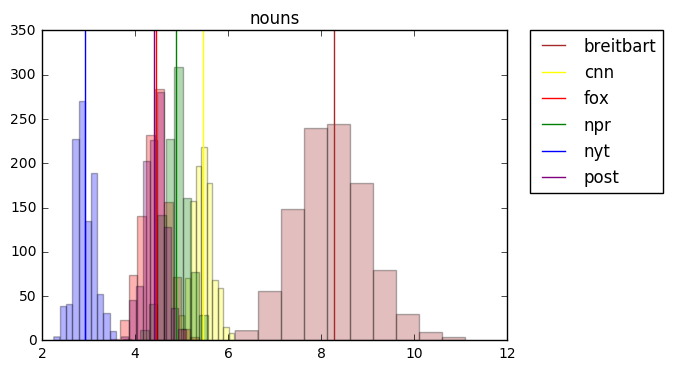

In [38]:
colors=['brown','yellow','red','green','blue','purple'];
x=0
column='nouns'
for source in df_hl.source.unique():
    a,b=bootstrap(source,column);
    plt.hist(b,color=colors[x],alpha=.3)
    plt.axvline(x=a,color=colors[x],label=source)
    x=x+1
plt.title(column);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

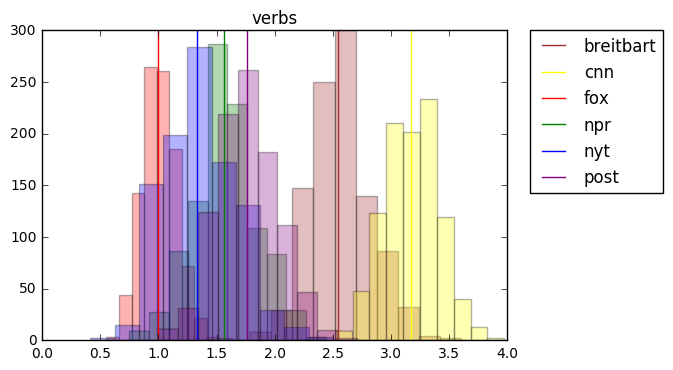

In [39]:
colors=['brown','yellow','red','green','blue','purple'];
x=0
column='verbs'
for source in df_hl.source.unique():
    a,b=bootstrap(source,column);
    plt.hist(b,color=colors[x],alpha=.3)
    plt.axvline(x=a,color=colors[x],label=source)
    x=x+1
plt.title(column);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

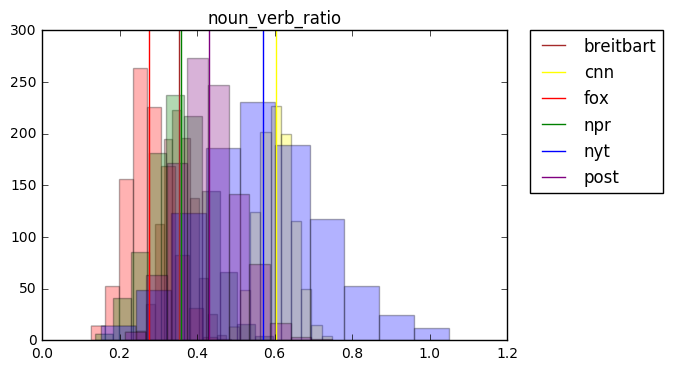

In [40]:
colors=['brown','yellow','red','green','blue','purple'];
x=0
column='noun_verb_ratio'
for source in df_hl.source.unique():
    a,b=bootstrap(source,column);
    plt.hist(b,color=colors[x],alpha=.3)
    plt.axvline(x=a,color=colors[x],label=source)
    x=x+1
plt.title(column);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

So, very large error bars. Only thing that <i>may</i> be statistically significant is that Breitbart uses a lot of nouns.

Of course, this may be reflected in the length the headlines found in Breitbart, which in turn may reflect poor coding on my part in extracting those headlines.

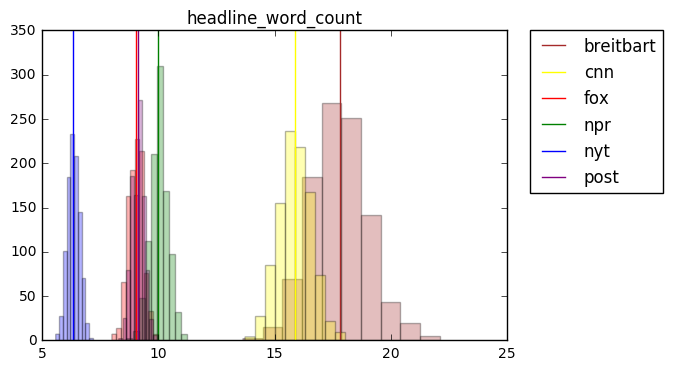

In [49]:
df_hl['headline_word_count']=df_hl['headline'].str.split().str.len()

colors=['brown','yellow','red','green','blue','purple'];
x=0
column='headline_word_count'
for source in df_hl.source.unique():
    a,b=bootstrap(source,column);
    plt.hist(b,color=colors[x],alpha=.3)
    plt.axvline(x=a,color=colors[x],label=source)
    x=x+1
plt.title(column);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

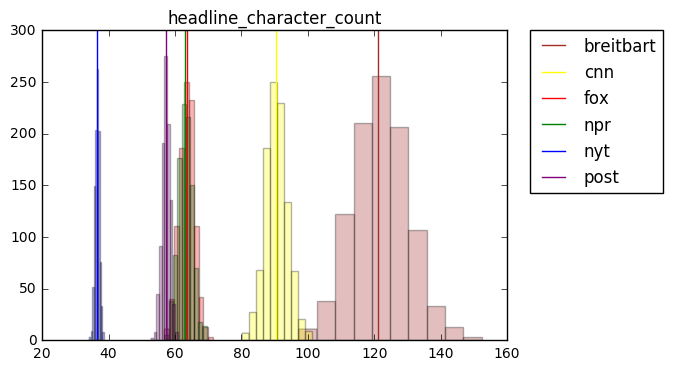

In [50]:
df_hl['headline_character_count']=df_hl['headline'].str.len()

colors=['brown','yellow','red','green','blue','purple'];
x=0
column='headline_character_count'
for source in df_hl.source.unique():
    a,b=bootstrap(source,column);
    plt.hist(b,color=colors[x],alpha=.3)
    plt.axvline(x=a,color=colors[x],label=source)
    x=x+1
plt.title(column);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

A more interesting investigation may be to look at the subjectivity and polarity of the headlines:

## Comparing polarity and subjectivity of headlines between the various news sources

In [51]:
df_hl['polarity']=0;
df_hl['subjectivity']=0;
for x in range(0,len(df_hl)):
    text=TextBlob(df_hl.loc[x,'headline'])
    sent=text.sentiment;
    df_hl.loc[x,'polarity']=sent[0];
    df_hl.loc[x,'subjectivity']=sent[1];

In [53]:
df_hl[['source','polarity','subjectivity']].groupby('source').mean()

,polarity,subjectivity
source,,
breitbart,-0.037056,0.343770
cnn,-0.012326,0.196285
fox,0.092256,0.157099
npr,0.019792,0.153125
nyt,-0.100926,0.231481
post,-0.044118,0.066667


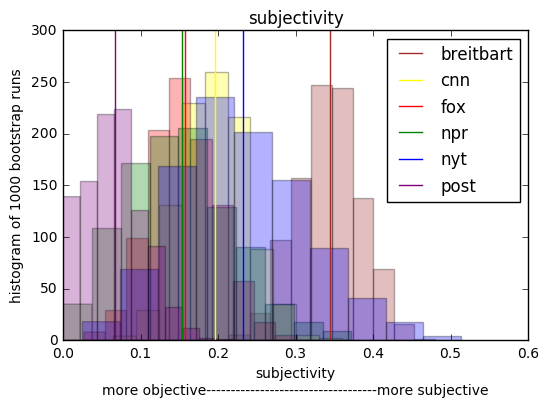

In [62]:
colors=['brown','yellow','red','green','blue','purple'];
x=0
column='subjectivity'
for source in df_hl.source.unique():
    a,b=bootstrap(source,column);
    plt.hist(b,color=colors[x],alpha=.3)
    plt.axvline(x=a,color=colors[x],label=source)
    x=x+1
plt.title(column);
plt.legend();
plt.xlabel('subjectivity\nmore objective-----------------------------------more subjective')
plt.ylabel('histogram of 1000 bootstrap runs')

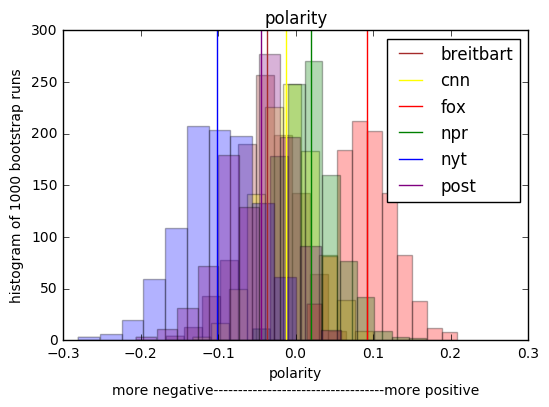

In [58]:
colors=['brown','yellow','red','green','blue','purple'];
x=0
column='polarity'
for source in df_hl.source.unique():
    a,b=bootstrap(source,column);
    plt.hist(b,color=colors[x],alpha=.3)
    plt.axvline(x=a,color=colors[x],label=source)
    x=x+1
plt.title(column);
plt.legend();
plt.xlabel('polarity\nmore negative-----------------------------------more positive')
plt.ylabel('histogram of 1000 bootstrap runs')

A very quick first pass shows nothing very interesting. Polarity mostly centered and subjectivity tending towards more objective.

A good explanation for this in the number of nominal scores various headlines receive:

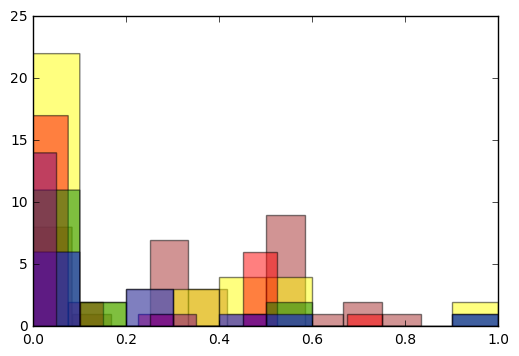

In [63]:
colors=['brown','yellow','red','green','blue','purple'];
column='subjectivity'
x=0
for source in df_hl.source.unique():
    plt.hist(df_hl.loc[df_hl.loc[:,'source']==source,column],alpha=.5,color=colors[x])
    x=x+1
plt.show()

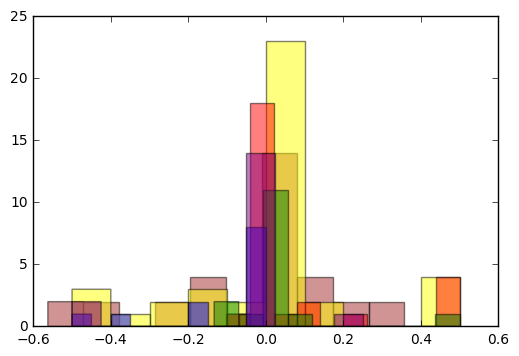

In [64]:
colors=['brown','yellow','red','green','blue','purple'];
column='polarity'
x=0
for source in df_hl.source.unique():
    plt.hist(df_hl.loc[df_hl.loc[:,'source']==source,column],alpha=.5,color=colors[x])
    x=x+1
plt.show()

Additional work could be done with this data set at a later date, but my intial reaction is:  not enough data to see anthing statistically cool...